In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [4]:
company = 'EREGL.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2023,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,37.580002,37.580002,37.580002,37.580002,37.580002,0
2023-02-15,40.000000,41.320000,40.000000,41.320000,41.320000,31433746
2023-02-16,44.799999,44.900002,41.820000,44.500000,44.500000,192285627
2023-02-17,43.500000,45.459999,43.099998,45.139999,45.139999,166594821
2023-02-20,45.360001,49.639999,45.060001,49.320000,49.320000,238946359
2023-02-21,49.500000,53.549999,49.380001,49.860001,49.860001,247809812
2023-02-22,49.020000,49.060001,45.259998,45.500000,45.500000,180506353
2023-02-23,45.500000,45.560001,44.200001,44.380001,44.380001,101202300
2023-02-24,44.500000,46.000000,44.200001,44.240002,44.240002,124892537


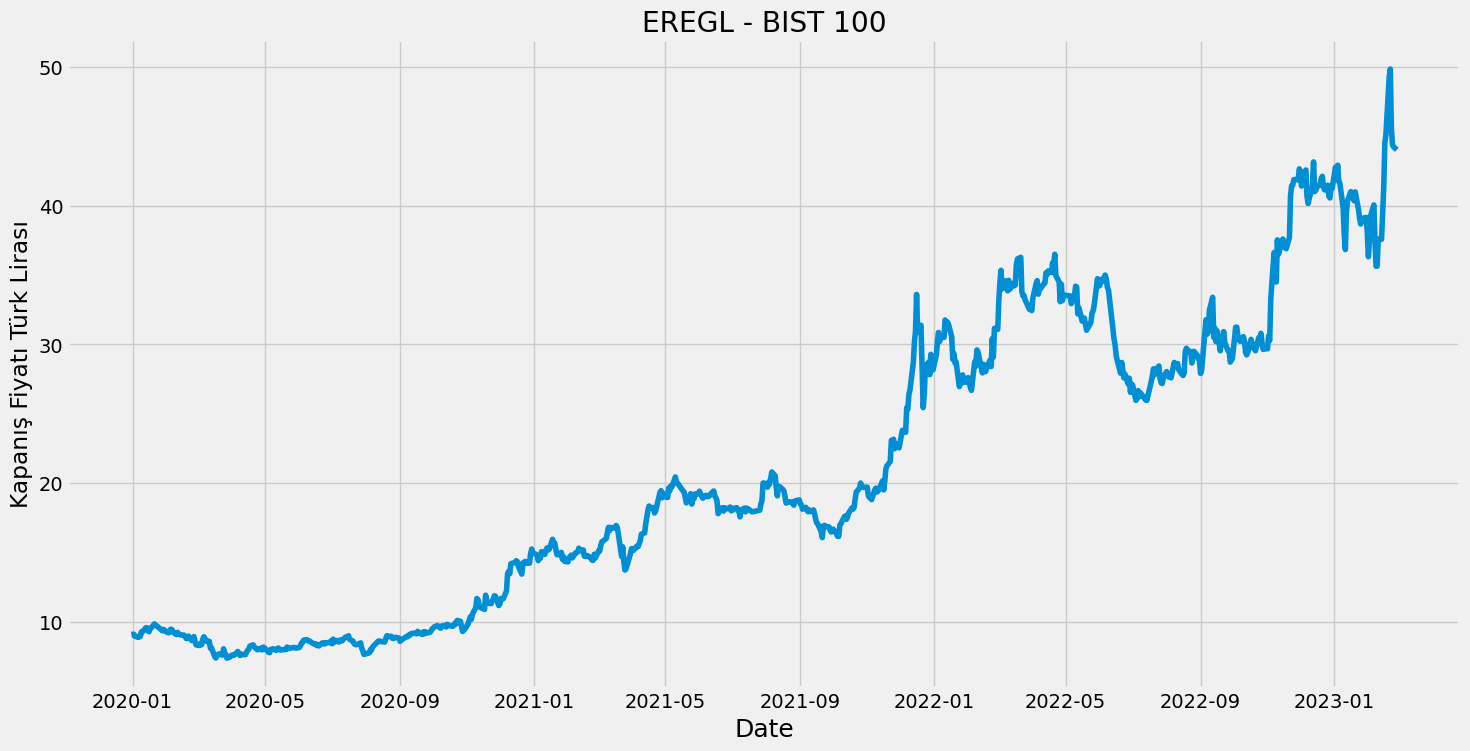

In [5]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("EREGL - BIST 100")
plt.show()

In [6]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

636


In [7]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.00094088e-02],
       [4.07154734e-02],
       [3.74205725e-02],
       [3.53024235e-02],
       [3.67145303e-02],
       [3.64791754e-02],
       [4.44810617e-02],
       [4.44810617e-02],
       [5.13061960e-02],
       [5.17768833e-02],
       [4.63638558e-02],
       [4.47164166e-02],
       [4.91880470e-02],
       [5.60131813e-02],
       [5.81313303e-02],
       [5.50717842e-02],
       [5.48364294e-02],
       [5.34243450e-02],
       [4.84820048e-02],
       [4.63638558e-02],
       [4.87173372e-02],
       [4.80112951e-02],
       [4.54224587e-02],
       [4.28336000e-02],
       [4.73052529e-02],
       [4.91880470e-02],
       [4.82466499e-02],
       [4.40103519e-02],
       [4.00094088e-02],
       [4.37749971e-02],
       [4.09508059e-02],
       [4.02447637e-02],
       [3.93033666e-02],
       [3.90680117e-02],
       [3.64791754e-02],
       [3.31842745e-02],
       [3.38903391e-02],
       [3.74205725e-02],
       [2.98893960e-02],
       [3.08307931e-02],


In [8]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.04000941, 0.04071547, 0.03742057, 0.03530242, 0.03671453,
       0.03647918, 0.04448106, 0.04448106, 0.0513062 , 0.05177688,
       0.04636386, 0.04471642, 0.04918805, 0.05601318, 0.05813133,
       0.05507178, 0.05483643, 0.05342434, 0.048482  , 0.04636386,
       0.04871734, 0.0480113 , 0.04542246, 0.0428336 , 0.04730525,
       0.04918805, 0.04824665, 0.04401035, 0.04000941, 0.043775  ,
       0.04095081, 0.04024476, 0.03930337, 0.03906801, 0.03647918,
       0.03318427, 0.03389034, 0.03742057, 0.0298894 , 0.03083079,
       0.03647918, 0.02847729, 0.0223582 , 0.0214168 , 0.02494706,
       0.02282891, 0.03153684, 0.03624382, 0.0280066 , 0.02847729,
       0.02847729, 0.01694517, 0.01741586, 0.00235349, 0.00023535,
       0.004707  , 0.00588374, 0.00729583, 0.0051777 , 0.01576842])]
[0.008472584781678949]



In [9]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(576, 60, 1)

In [11]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Modeli derle
model.compile(optimizer="adam",loss="mean_squared_error")

In [13]:
#Modeli eğit
model.fit(x_train,y_train,batch_size=1, epochs=1)

576/576 [==============================] - 10s 12ms/step - loss: 0.0029


In [14]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [16]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 11ms/step


In [18]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.19583508938173705

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17928\3629532487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


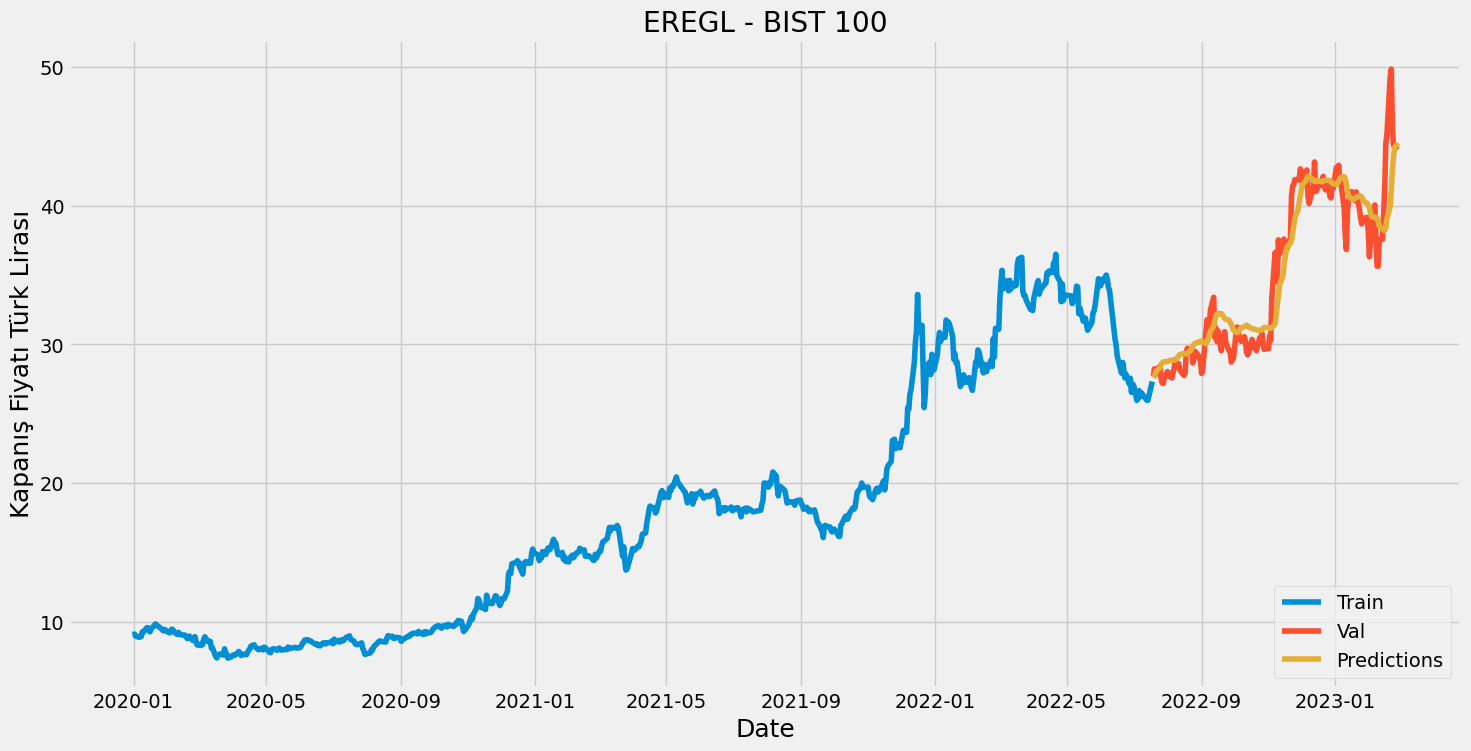

In [19]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("EREGL - BIST 100")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()